Original implementation of Contrastive-sc method
(https://github.com/ciortanmadalina/contrastive-sc)

In [1]:
import sys
sys.path.append("..")
from sklearn import metrics
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from collections import Counter
from sklearn.manifold import TSNE
import train
import random
run =0
torch.manual_seed(run)
torch.cuda.manual_seed_all(run)
np.random.seed(run)
random.seed(run)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

plt.ion()
plt.show()
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
path= "../"

/opt/conda/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [2]:
!ls ../real_data

10X_PBMC.h5			 Quake_Smart-seq2_Lung.h5
Adam.h5				 Quake_Smart-seq2_Trachea.h5
Muraro.h5			 Romanov.h5
Quake_10x_Bladder.h5		 Young.h5
Quake_10x_Limb_Muscle.h5	 mouse_ES_cell.h5
Quake_10x_Spleen.h5		 mouse_bladder_cell.h5
Quake_Smart-seq2_Diaphragm.h5	 worm_neuron_cell.h5
Quake_Smart-seq2_Limb_Muscle.h5


In [3]:
path = "../"
dataset = 'Quake_Smart-seq2_Trachea'

In [4]:
data_mat = h5py.File(f"{path}real_data/{dataset}.h5", "r")
X = np.array(data_mat['X'])
Y = np.array(data_mat['Y'])
print(np.where(X ==0)[0].shape[0]/(X.shape[0]*X.shape[1]))
cluster_number = np.unique(Y).shape[0]
nb_genes = 500


X = train.preprocess(X, nb_genes = nb_genes)

0.854844741489701
(1350, 23341) (1350, 23341) keeping 500 genes


In [5]:
results = train.run(X,
                     cluster_number,
                     dataset,
                     Y=Y,
                     nb_epochs=30,
                     layers=[200, 40, 60],
                     dropout = 0.9,
                     save_pred = True,
                     cluster_methods =["KMeans", "Leiden"])

In [6]:
results

{'features': array([[-0.15006182, -0.06026107, -0.03976745, ...,  0.1775209 ,
          0.16880919,  0.16574986],
        [ 0.3999364 , -0.01872833,  0.03501533, ...,  0.12748782,
          0.12758893,  0.11673879],
        [-0.10001991, -0.0929367 , -0.1258707 , ...,  0.06556363,
          0.12960899,  0.13068129],
        ...,
        [ 0.04120698, -0.00570735,  0.14324227, ...,  0.14021303,
          0.15756568,  0.16045986],
        [-0.11798541, -0.13845368, -0.11018568, ...,  0.12110843,
          0.17078172,  0.16758236],
        [-0.12768573, -0.0287798 ,  0.05021833, ...,  0.17414409,
          0.17005096,  0.17155209]], dtype=float32),
 't_clust': 1613641426.2019475,
 'kmeans_ari': 0.8757419746828033,
 'kmeans_nmi': 0.8539321434363977,
 'kmeans_sil': 0.6120204,
 'kmeans_cal': 1111.7352139136224,
 't_k': 1613641426.284037,
 'kmeans_pred': array([0, 2, 1, ..., 0, 0, 0], dtype=int32),
 'leiden_ari': 0.2748522379361083,
 'leiden_nmi': 0.586511817555583,
 'leiden_sil': 0.37626925,

In [7]:
X_embedded = TSNE(n_components=2).fit_transform(results["features"])

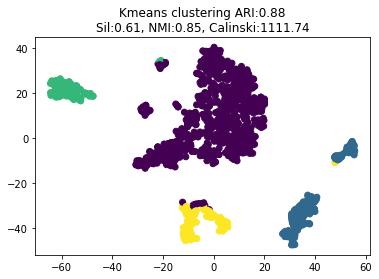

In [8]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = results['kmeans_pred'])
plt.title(f"Kmeans clustering ARI:{round(results['kmeans_ari'], 2)}\n"+
          f"Sil:{round(float(results['kmeans_sil']),2)}, NMI:{round(float(results['kmeans_nmi']),2)}, "+
          f"Calinski:{round(float(results['kmeans_cal']),2)}"
         );

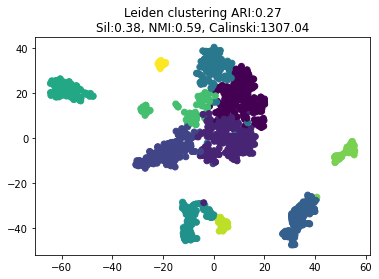

In [9]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = results['leiden_pred'])
plt.title(f"Leiden clustering ARI:{round(results['leiden_ari'], 2)}\n"+
          f"Sil:{round(float(results['leiden_sil']),2)}, NMI:{round(float(results['leiden_nmi']),2)}, "+
          f"Calinski:{round(float(results['leiden_cal']),2)}"
         );